# 1. 读取数据

In [30]:
from Bio import SeqIO
import os
import matplotlib.pyplot as plt
from collections import Counter
import random

family_dict = {'PF00959':0, 'PF01832':1, 'PF05838':2, 'PF06737':3,'PF16754':4}


可变参数如下

In [55]:
family_name = 'PF06737'
data_version = '9'
p = 0.5
# 定义长度范围
min_length = 60  # 最小长度
max_length = 256  # 最大长度
artificial_dataset_path = '../dataset/lora_generation_dataset/'
natural_dataset_path = '../dataset/lysozyme_dataset/'
output_path = 'filter_dataset/'
data_size = 500    # 参与对齐的数据集大小
data_dir = 'filter_dataset/'


In [56]:
def draw(sequences, fileName):
    # 计算每个序列的长度
    lengths = [len(seq) for seq in sequences]

    # 使用Counter统计每个长度的序列数量
    length_counts = Counter(lengths)
    # 获取长度和对应的数量
    lengths = list(length_counts.keys())
    counts = list(length_counts.values())
    # 创建一个新的图表
    plt.figure()
    # 创建柱状图
    plt.bar(lengths, counts)
    # 添加标题和标签
    plt.title(f'Sequence Lengths {fileName}')
    plt.xlabel('Length')
    plt.ylabel('Count')
    plt.xlim(0, 1000)
    plt.ylim(0, 200)
    # 显示图表
    plt.show()

def plot_length_distribution(sequences, family_name):
    # 计算每个序列的长度
    lengths = [len(seq) for seq in sequences]
    plt.hist(lengths, bins=100, range=(0, 1000), color='skyblue')
    plt.xlabel(family_name+ ' Sequence Length')
    plt.ylabel('Count')
    plt.title('Sequence Length Distribution')
    plt.show()

def read_from_fasta(file):
    # 读取fasta文件，并返回当前文件中的序列
    sequences = []
    for record in SeqIO.parse(file, 'fasta'):
        sequences.append(str(record.seq))
    return sequences

def read_from_txt(file):
    # 读取txt文件
    sequences = []
    with open(file, 'r') as f:
        for line in f:
            line = line.split(',')
            sequences.append(line[0].strip())
    return sequences

## (1). 读取人工序列

读取原始序列

processing:  PF06737 ...
原始序列数:  10240


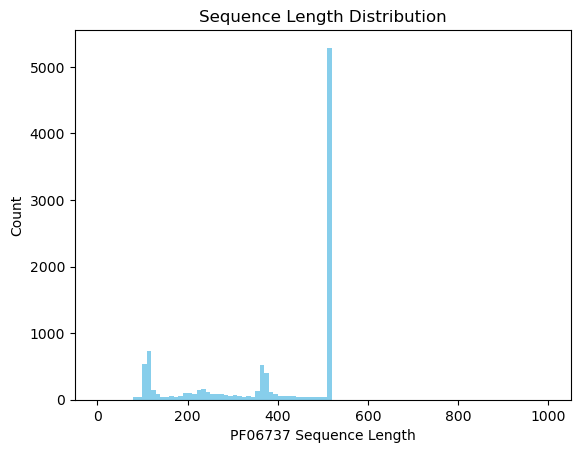

In [57]:
print("processing: ", family_name, "...")
code = family_dict[family_name]
# 读取fasta文件
artificial_file_name = artificial_dataset_path + str(data_version)+'_samples_lora_code_'+str(code)+'_'+str(p)+'.txt'
artificial_origin_sequences = read_from_txt(artificial_file_name)
print("原始序列数: ", len(list(artificial_origin_sequences)))
plot_length_distribution(artificial_origin_sequences, family_name)

过滤出特定长度的序列

过滤后序列数:  2577


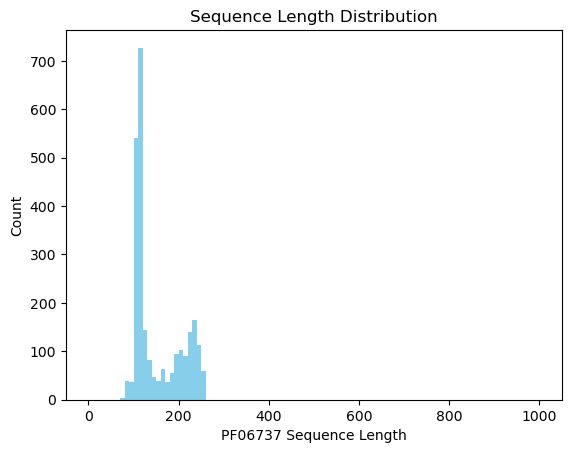

In [58]:
artificial_filtered_sequences = [seq for seq in list(artificial_origin_sequences) if min_length <= len(seq) <= max_length]
print("过滤后序列数: ", len(artificial_filtered_sequences))
plot_length_distribution(artificial_filtered_sequences, family_name)

随机选择若干条，并写入文件保存

In [59]:
# 从artificial_filtered_sequences中随机选取data_size个序列
artificial_filtered_sequences = random.sample(artificial_filtered_sequences, data_size)
print("随机选取后序列数: ", len(artificial_filtered_sequences))
# 保存到output_path文件中
output_file_name = output_path + 'artificial_'+family_name+'_filtered_'+str(data_size)+'.txt'
with open(output_file_name, 'w') as f:
    for seq in artificial_filtered_sequences:
        f.write(seq+'\n')

随机选取后序列数:  500


## (2). 读取自然序列

读取原始fasta文件

processing:  PF06737 ...
原始序列数:  13744


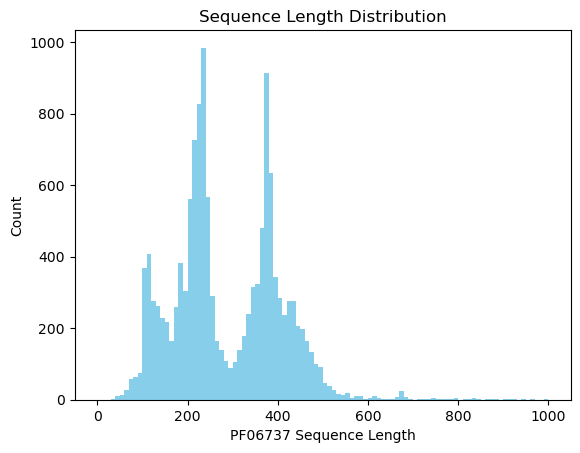

In [60]:
print("processing: ", family_name, "...")
code = family_dict[family_name]
# 读取fasta文件
natural_file_name = natural_dataset_path + family_name + '.fasta'
natural_origin_sequences = read_from_fasta(natural_file_name)
print("原始序列数: ", len(list(natural_origin_sequences)))
plot_length_distribution(natural_origin_sequences, family_name)

过滤出特定长度的序列

过滤后序列数:  6984


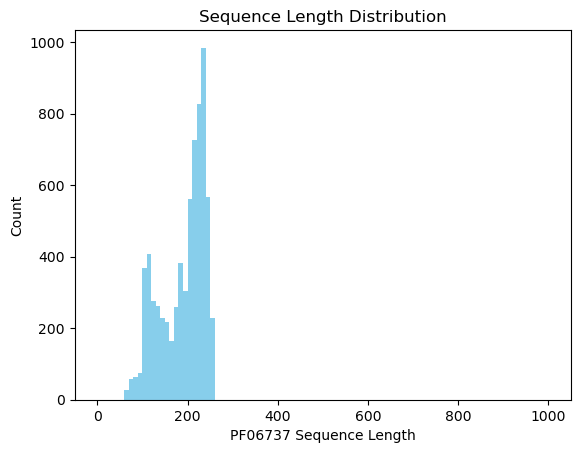

In [61]:
natural_filtered_sequences = [seq for seq in list(natural_origin_sequences) if min_length <= len(seq) <= max_length]
print("过滤后序列数: ", len(natural_filtered_sequences))
plot_length_distribution(natural_filtered_sequences, family_name)

随机选择若干条，并写入文件保存

In [62]:
# 从artificial_filtered_sequences中随机选取data_size个序列
natural_filtered_sequences = random.sample(natural_filtered_sequences, data_size)
# 保存到output_path文件中
output_file_name = output_path + 'natural_'+family_name+'_filtered_'+str(data_size)+'.txt'
with open(output_file_name, 'w') as f:
    for seq in natural_filtered_sequences:
        f.write(seq+'\n')

## (3). 将人工序列和自然序列写入同一个文件，以便同步对齐

In [ ]:
from Bio import SeqIO

# 使用bio库将txt文件转化为fasta文件
def txt2fasta(txt_file, fasta_file, name):
    with open(txt_file, 'r') as file:
        content = file.readlines()

    records = []
    for index, line in enumerate(content):
        seq = line.strip()
        seq_id = name+f'_seq_{index+1}'
        record = SeqIO.SeqRecord(seq, id=seq_id, description='')
        records.append(record)
    with open(fasta_file, 'w') as output:
        SeqIO.write(records, output, 'fasta')

# 将两个fasta文件合并为一个
def merge_fasta(fasta_file1, fasta_file2, merged_file):
    records1 = list(SeqIO.parse(fasta_file1, 'fasta'))
    print("第一个文件序列数：", len(records1), "条")
    records2 = list(SeqIO.parse(fasta_file2, 'fasta'))
    print("第二个文件序列数：", len(records2), "条")
    records = records1 + records2
    print("合并后的序列数：", len(records), "条")
    with open(merged_file, 'w') as output:
        SeqIO.write(records, output, 'fasta')

artificial_txt = data_dir + 'artificial_'+family_name+'_filtered_'+str(data_size)+'.txt'
artificial_fasta = data_dir + 'artificial_'+family_name+'_filtered_'+str(data_size)+'.fasta'
txt2fasta(artificial_txt, artificial_fasta, "artificial")

natural_txt = data_dir + 'natural_'+family_name+'_filtered_'+str(data_size)+'.txt'
natural_fasta = data_dir + 'natural_'+family_name+'_filtered_'+str(data_size)+'.fasta'
txt2fasta(natural_txt, natural_fasta, "natural")

merged_fasta = data_dir + family_name+'_merged_'+str(data_size*2)+'.fasta'
merge_fasta(artificial_fasta, natural_fasta, merged_fasta)

第一个文件序列数： 200 条
第二个文件序列数： 200 条
合并后的序列数： 400 条
